In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")


In [56]:
data = pd.read_csv("/content/Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


In [57]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 145024
Columns: 13


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145024 entries, 0 to 145023
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 145024 non-null  int64  
 1   Income             145024 non-null  int64  
 2   Age                145024 non-null  int64  
 3   Experience         145024 non-null  int64  
 4   Married/Single     145024 non-null  object 
 5   House_Ownership    145024 non-null  object 
 6   Car_Ownership      145023 non-null  object 
 7   Profession         145023 non-null  object 
 8   CITY               145023 non-null  object 
 9   STATE              145023 non-null  object 
 10  CURRENT_JOB_YRS    145023 non-null  float64
 11  CURRENT_HOUSE_YRS  145023 non-null  float64
 12  Risk_Flag          145023 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 14.4+ MB


In [59]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        1
Profession           1
CITY                 1
STATE                1
CURRENT_JOB_YRS      1
CURRENT_HOUSE_YRS    1
Risk_Flag            1
dtype: int64

In [60]:
data = data.dropna(axis=0)
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [61]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [62]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,145023.000000,1.450230e+05,145023.000000,145023.000000,145023.000000,145023.000000,145023.000000
mean,72512.000000,4.999788e+06,49.974942,10.110672,6.342235,11.996538,0.114906
std,41864.678382,2.876182e+06,17.059308,5.996469,3.644374,1.396022,0.318909
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,36256.500000,2.506726e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,72512.000000,5.004535e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,108767.500000,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,145023.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


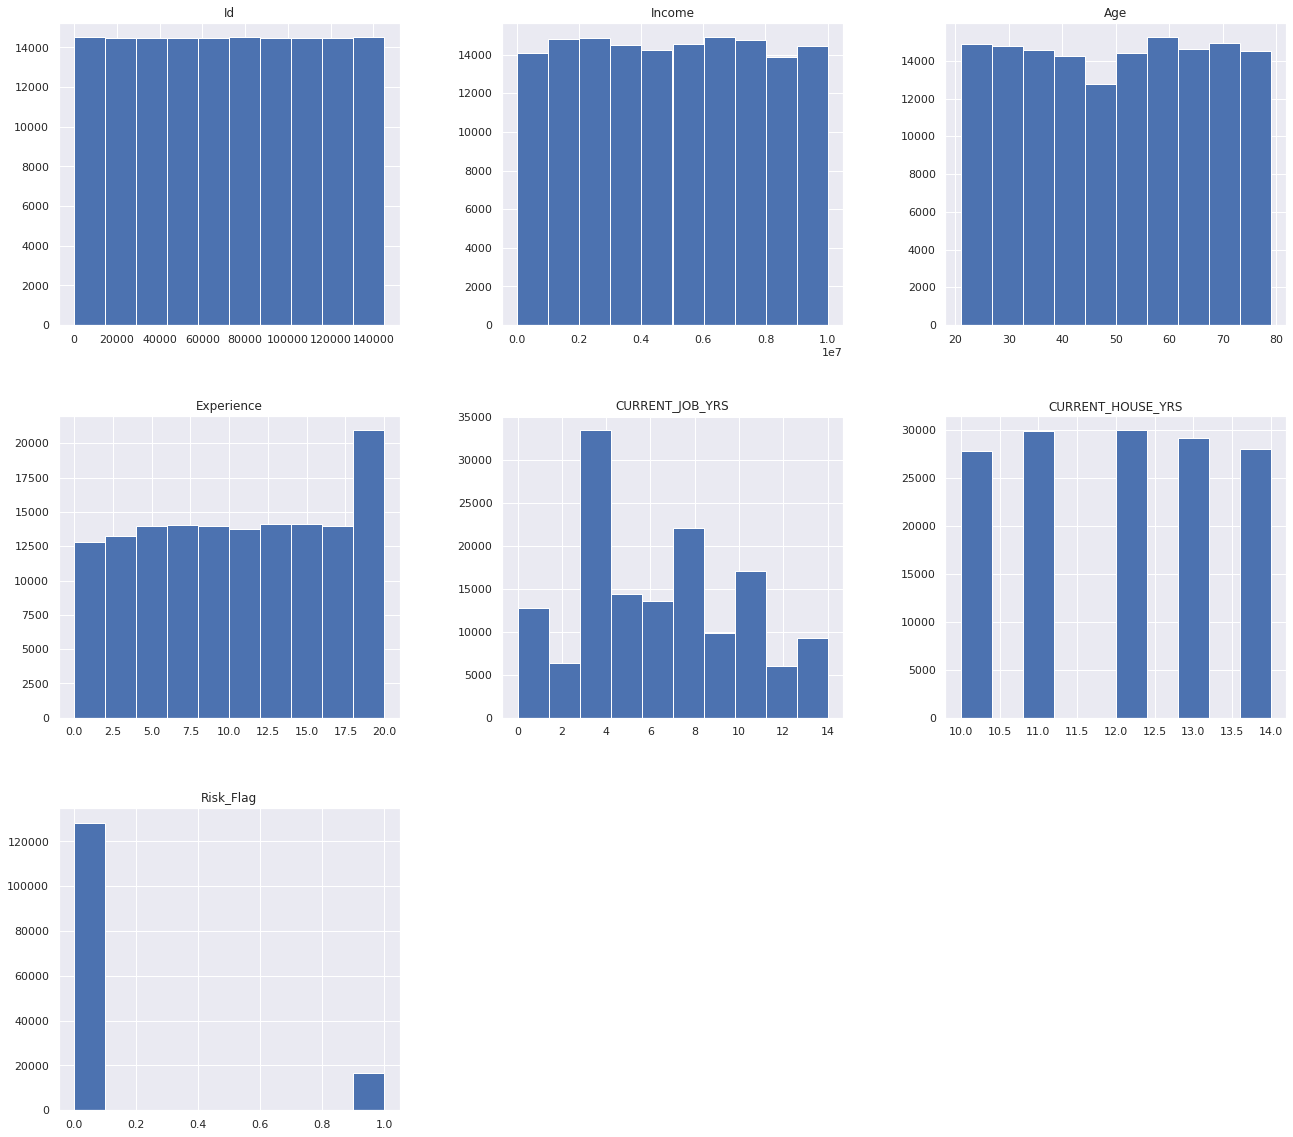

In [63]:
data.hist( figsize = (22, 20) )
plt.show()

In [64]:
data["Risk_Flag"].value_counts()

0.0    128359
1.0     16664
Name: Risk_Flag, dtype: int64

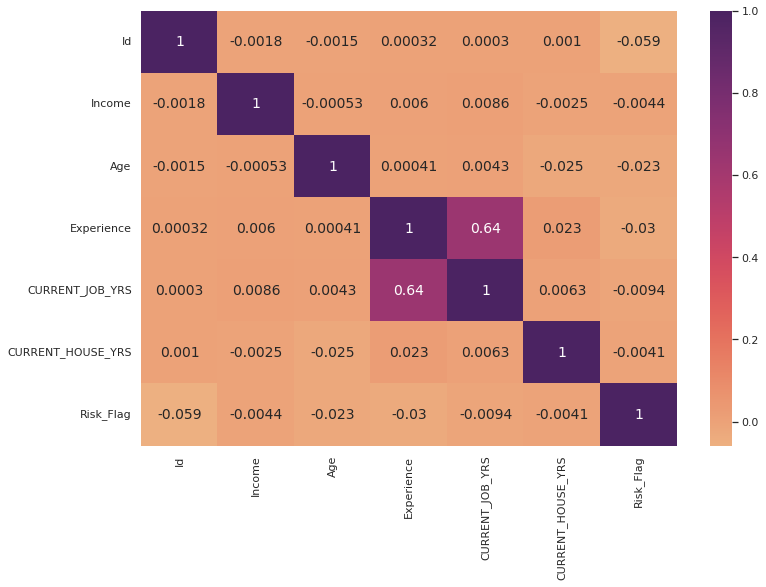

In [65]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [66]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

In [67]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        16383
Maharashtra          14740
Andhra_Pradesh       14587
West_Bengal          13522
Bihar                11396
Tamil_Nadu            9568
Madhya_Pradesh        8090
Karnataka             6813
Gujarat               6630
Rajasthan             5206
Jharkhand             5188
Haryana               4452
Telangana             4245
Assam                 4146
Kerala                3349
Delhi                 3161
Punjab                2728
Odisha                2663
Chhattisgarh          2184
Uttarakhand           1096
Jammu_and_Kashmir     1031
Puducherry             817
Manipur                499
Mizoram                493
Himachal_Pradesh       487
Tripura                458
Uttar_Pradesh[5]       410
Chandigarh             367
Sikkim                 314
Name: STATE, dtype: int64


rented          133537
owned             7376
norent_noown      4110
Name: House_Ownership, dtype: int64


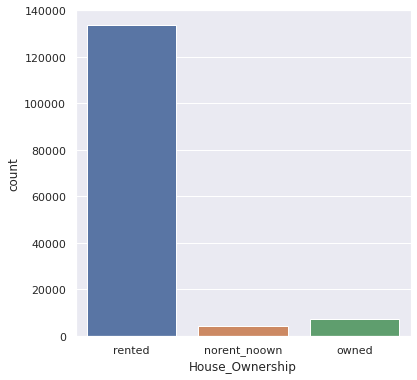

In [68]:
categorical_valcount_hist("House_Ownership")

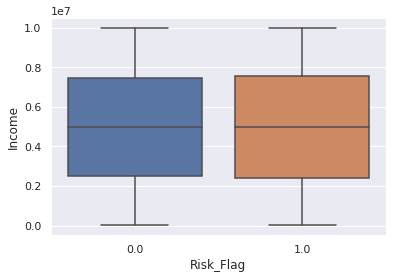

In [69]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

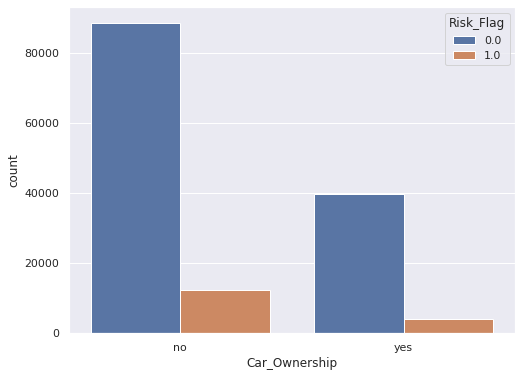

In [70]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

In [71]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 3.5 MB/s eta 0:00:00


In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce

In [73]:

label_encoder = LabelEncoder() 
for col in ['Married/Single','Car_Ownership']: data[col] = label_encoder.fit_transform( data[col] )
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )
high_card_features = ['Profession', 'CITY', 'STATE']
count_encoder = ce.CountEncoder()
# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))
data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)


In [74]:
y = data["Risk_Flag"]
x = data.drop("Risk_Flag", axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],['classifier', rf_clf]])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)


In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 66.6367
Precision: 71.346
F1-Score: 68.911
Accuracy score: 93.0908
AUC Score: 81.581
